In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Preprocessing Data


### Processing AP CS A Exam


In [ ]:
csa_score1020=pd.DataFrame()
state=[]
with pd.ExcelFile('/content/drive/Shareddrives/531project/CSA-2010-2020-By-State.xlsx') as xls:
    for sn in xls.sheet_names:
        if sn!="Sheet":
            state.append(sn)
            df=pd.read_excel('/content/drive/Shareddrives/531project/CSA-2010-2020-By-State.xlsx',sheet_name=sn)
            csa_score1020=pd.concat([csa_score1020,df])

femalepr1020=csa_score1020[['Year',' Total',' Total Passed',' % Passed','Fem Total',' Fem Passed',' % Fem Passed','Male Total',' Male Passed',' % Male Passed',]]
femalepr1020['STATE']=np.repeat(state,11)
femalepr1119=femalepr1020[(femalepr1020['Year']!=2010 )& (femalepr1020['Year']!=2020)]
femalepr1119.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Year,Total,Total Passed,% Passed,Fem Total,Fem Passed,% Fem Passed,Male Total,Male Passed,% Male Passed
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
mean,2015.000000,858.063181,562.381264,61.415468,190.886710,118.845316,50.661525,667.176471,443.385621,62.121765
std,2.584806,1540.950704,1055.671005,16.041898,390.149888,258.474176,25.523681,1154.254723,800.025751,16.207440
min,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,79.000000,49.000000,55.510000,12.000000,7.000000,40.000000,62.500000,40.500000,56.100000
50%,2015.000000,239.000000,147.000000,64.890000,47.000000,23.000000,56.900000,192.000000,123.000000,65.400000
75%,2017.000000,989.500000,657.000000,70.820000,179.500000,107.500000,68.460000,792.000000,539.000000,71.880000
max,2019.000000,12423.000000,9050.000000,100.000000,3320.000000,2344.000000,100.000000,9103.000000,6706.000000,100.000000


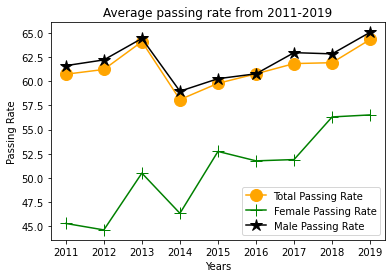

In [ ]:

df_mean_pr_year=femalepr1119.groupby('Year').mean().reset_index()
#draw the plot

plt.plot(df_mean_pr_year['Year'],df_mean_pr_year[' % Passed'],color='orange',marker ='o', markersize = 12, label ='Total Passing Rate')
plt.plot(df_mean_pr_year['Year'],df_mean_pr_year[' % Fem Passed'],color='green',marker ='+', markersize = 12, label ='Female Passing Rate')
plt.plot(df_mean_pr_year['Year'],df_mean_pr_year[' % Male Passed'],color='black',marker ='*', markersize = 12, label ='Male Passing Rate')
plt.xlabel('Years')
plt.ylabel('Passing Rate')
  
  
plt.title('Average passing rate from 2011-2019')
plt.legend()
plt.show()

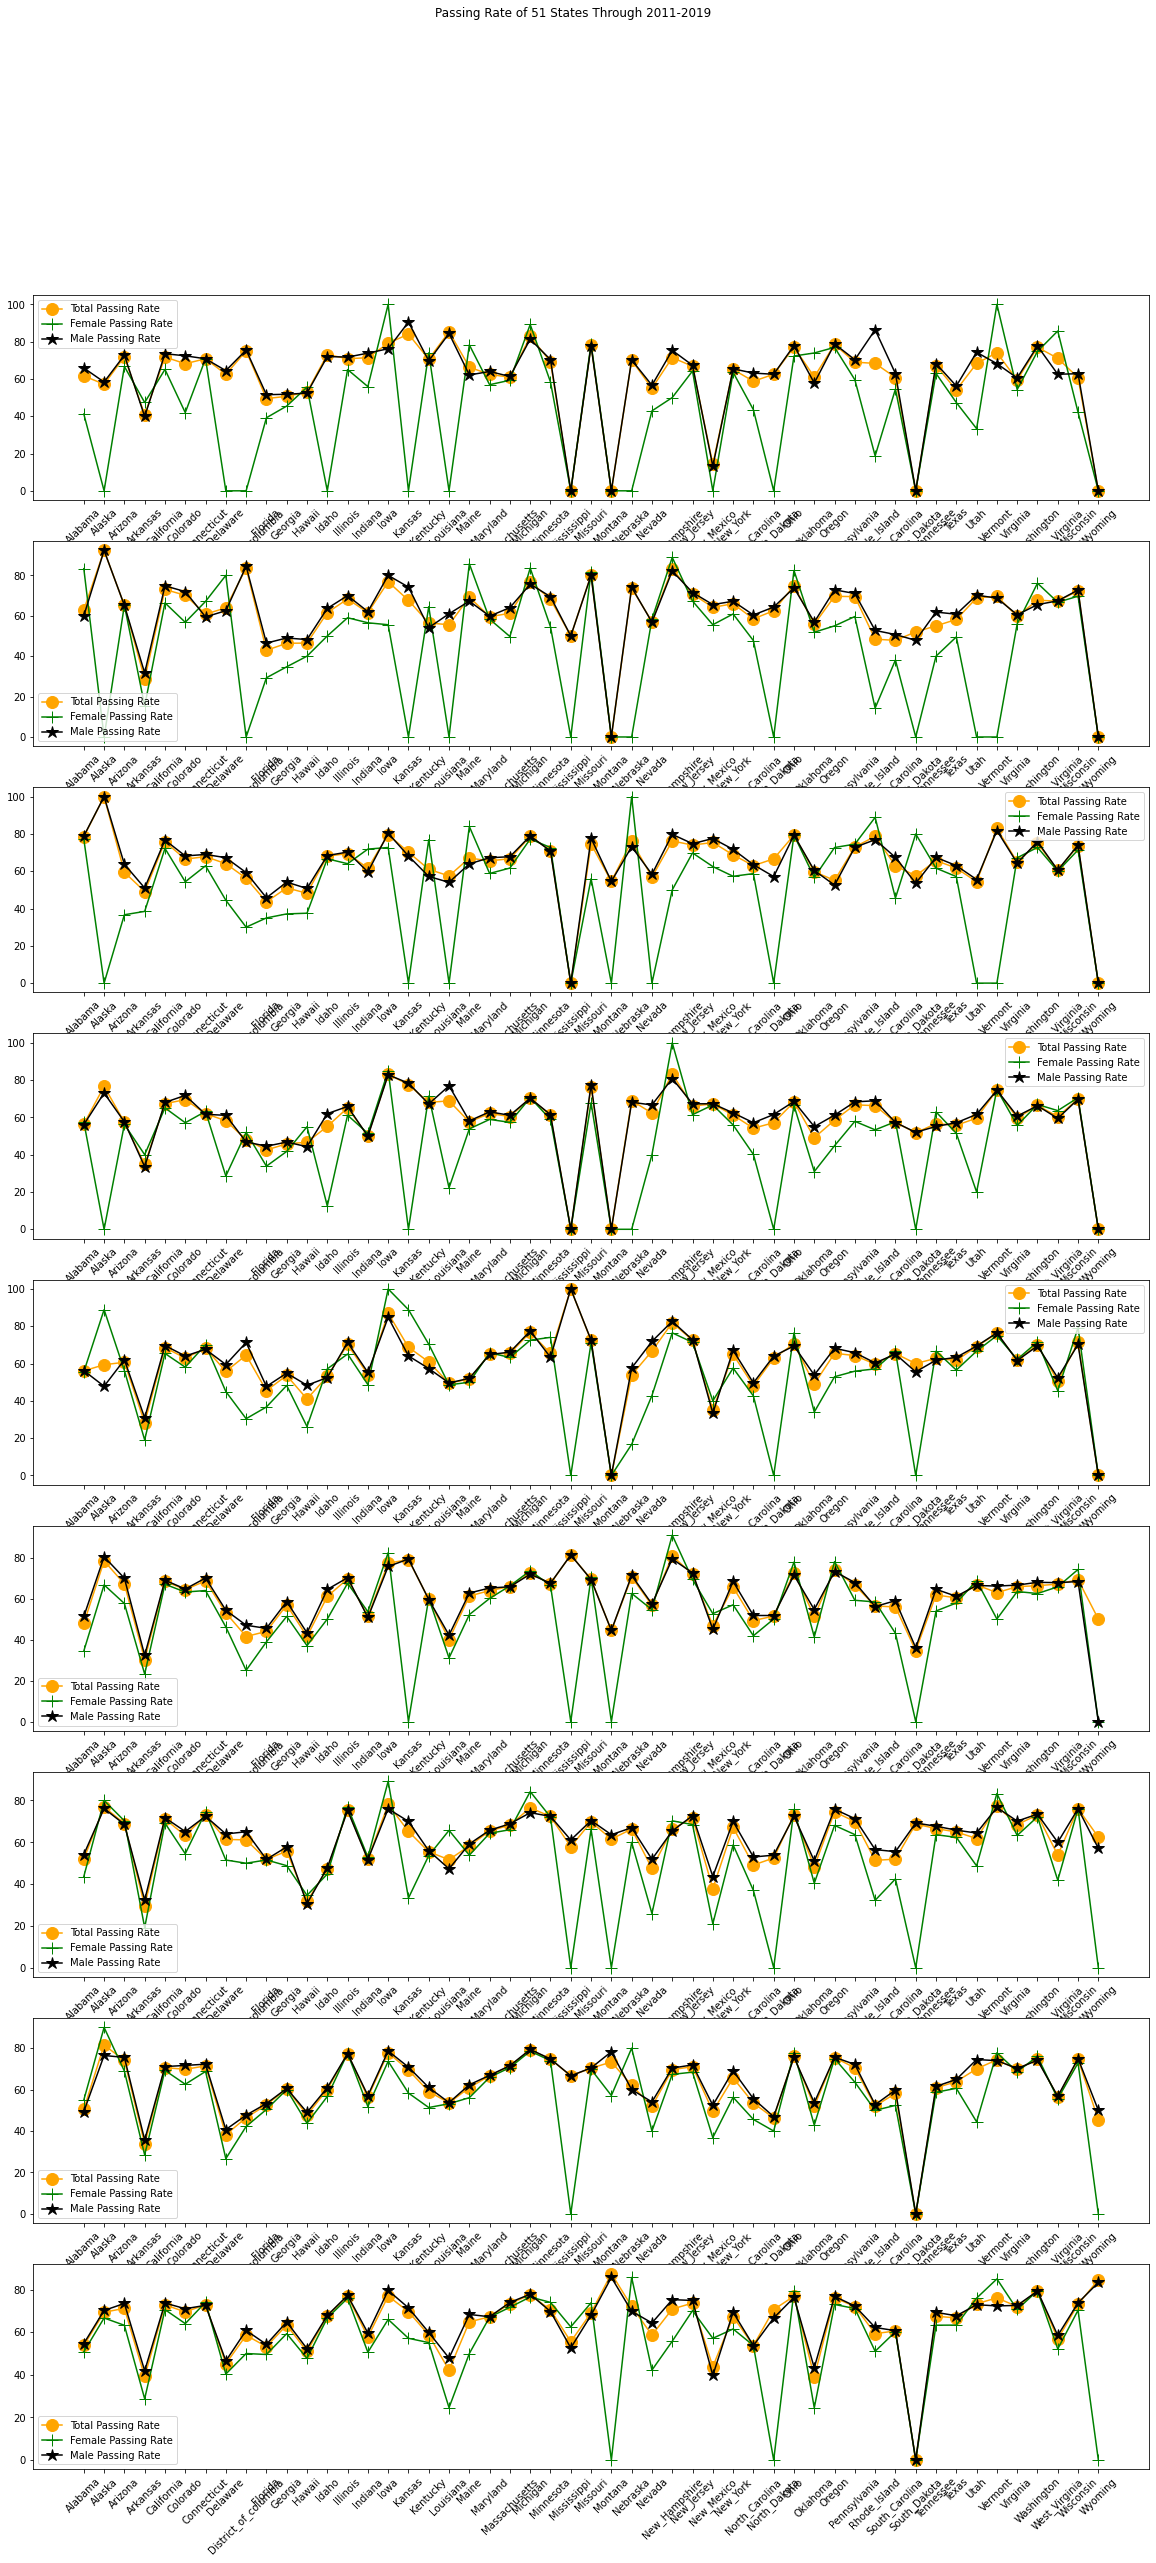

In [ ]:
fig, (ax1, ax2,ax3,ax4, ax5,ax6,ax7,ax8,ax9) = plt.subplots(9,1)
fig.set_figwidth(20)
fig.set_figheight(40)
fig.suptitle('Passing Rate of 51 States Through 2011-2019')
ax1.plot(femalepr1119[femalepr1119['Year']==2011]['STATE'], femalepr1119[femalepr1119['Year']==2011][' % Passed'],color='orange',marker ='o', markersize = 12, label ='Total Passing Rate')
ax1.plot(femalepr1119[femalepr1119['Year']==2011]['STATE'],femalepr1119[femalepr1119['Year']==2011][' % Fem Passed'],color='green',marker ='+', markersize = 12, label ='Female Passing Rate')
ax1.plot(femalepr1119[femalepr1119['Year']==2011]['STATE'],femalepr1119[femalepr1119['Year']==2011][' % Male Passed'],color='black',marker ='*', markersize = 12, label ='Male Passing Rate')
ax1.legend()
ax2.plot(femalepr1119[femalepr1119['Year']==2012]['STATE'], femalepr1119[femalepr1119['Year']==2012][' % Passed'],color='orange',marker ='o', markersize = 12, label ='Total Passing Rate')
ax2.plot(femalepr1119[femalepr1119['Year']==2012]['STATE'],femalepr1119[femalepr1119['Year']==2012][' % Fem Passed'],color='green',marker ='+', markersize = 12, label ='Female Passing Rate')
ax2.plot(femalepr1119[femalepr1119['Year']==2012]['STATE'],femalepr1119[femalepr1119['Year']==2012][' % Male Passed'],color='black',marker ='*', markersize = 12, label ='Male Passing Rate')
ax2.legend()
ax3.plot(femalepr1119[femalepr1119['Year']==2013]['STATE'], femalepr1119[femalepr1119['Year']==2013][' % Passed'],color='orange',marker ='o', markersize = 12, label ='Total Passing Rate')
ax3.plot(femalepr1119[femalepr1119['Year']==2013]['STATE'],femalepr1119[femalepr1119['Year']==2013][' % Fem Passed'],color='green',marker ='+', markersize = 12, label ='Female Passing Rate')
ax3.plot(femalepr1119[femalepr1119['Year']==2013]['STATE'],femalepr1119[femalepr1119['Year']==2013][' % Male Passed'],color='black',marker ='*', markersize = 12, label ='Male Passing Rate')
ax3.legend()
ax4.plot(femalepr1119[femalepr1119['Year']==2014]['STATE'], femalepr1119[femalepr1119['Year']==2014][' % Passed'],color='orange',marker ='o', markersize = 12, label ='Total Passing Rate')
ax4.plot(femalepr1119[femalepr1119['Year']==2014]['STATE'],femalepr1119[femalepr1119['Year']==2014][' % Fem Passed'],color='green',marker ='+', markersize = 12, label ='Female Passing Rate')
ax4.plot(femalepr1119[femalepr1119['Year']==2014]['STATE'],femalepr1119[femalepr1119['Year']==2014][' % Male Passed'],color='black',marker ='*', markersize = 12, label ='Male Passing Rate')
ax4.legend()
ax5.plot(femalepr1119[femalepr1119['Year']==2015]['STATE'], femalepr1119[femalepr1119['Year']==2015][' % Passed'],color='orange',marker ='o', markersize = 12, label ='Total Passing Rate')
ax5.plot(femalepr1119[femalepr1119['Year']==2015]['STATE'],femalepr1119[femalepr1119['Year']==2015][' % Fem Passed'],color='green',marker ='+', markersize = 12, label ='Female Passing Rate')
ax5.plot(femalepr1119[femalepr1119['Year']==2015]['STATE'],femalepr1119[femalepr1119['Year']==2015][' % Male Passed'],color='black',marker ='*', markersize = 12, label ='Male Passing Rate')
ax5.legend()
ax6.plot(femalepr1119[femalepr1119['Year']==2016]['STATE'], femalepr1119[femalepr1119['Year']==2016][' % Passed'],color='orange',marker ='o', markersize = 12, label ='Total Passing Rate')
ax6.plot(femalepr1119[femalepr1119['Year']==2016]['STATE'],femalepr1119[femalepr1119['Year']==2016][' % Fem Passed'],color='green',marker ='+', markersize = 12, label ='Female Passing Rate')
ax6.plot(femalepr1119[femalepr1119['Year']==2016]['STATE'],femalepr1119[femalepr1119['Year']==2016][' % Male Passed'],color='black',marker ='*', markersize = 12, label ='Male Passing Rate')
ax6.legend()
ax7.plot(femalepr1119[femalepr1119['Year']==2017]['STATE'], femalepr1119[femalepr1119['Year']==2017][' % Passed'],color='orange',marker ='o', markersize = 12, label ='Total Passing Rate')
ax7.plot(femalepr1119[femalepr1119['Year']==2017]['STATE'],femalepr1119[femalepr1119['Year']==2017][' % Fem Passed'],color='green',marker ='+', markersize = 12, label ='Female Passing Rate')
ax7.plot(femalepr1119[femalepr1119['Year']==2017]['STATE'],femalepr1119[femalepr1119['Year']==2017][' % Male Passed'],color='black',marker ='*', markersize = 12, label ='Male Passing Rate')
ax7.legend()
ax8.plot(femalepr1119[femalepr1119['Year']==2018]['STATE'], femalepr1119[femalepr1119['Year']==2018][' % Passed'],color='orange',marker ='o', markersize = 12, label ='Total Passing Rate')
ax8.plot(femalepr1119[femalepr1119['Year']==2018]['STATE'],femalepr1119[femalepr1119['Year']==2018][' % Fem Passed'],color='green',marker ='+', markersize = 12, label ='Female Passing Rate')
ax8.plot(femalepr1119[femalepr1119['Year']==2018]['STATE'],femalepr1119[femalepr1119['Year']==2018][' % Male Passed'],color='black',marker ='*', markersize = 12, label ='Male Passing Rate')
ax8.legend()
ax9.plot(femalepr1119[femalepr1119['Year']==2019]['STATE'], femalepr1119[femalepr1119['Year']==2019][' % Passed'],color='orange',marker ='o', markersize = 12, label ='Total Passing Rate')
ax9.plot(femalepr1119[femalepr1119['Year']==2019]['STATE'],femalepr1119[femalepr1119['Year']==2019][' % Fem Passed'],color='green',marker ='+', markersize = 12, label ='Female Passing Rate')
ax9.plot(femalepr1119[femalepr1119['Year']==2019]['STATE'],femalepr1119[femalepr1119['Year']==2019][' % Male Passed'],color='black',marker ='*', markersize = 12, label ='Male Passing Rate')
ax9.legend()
for ax in  fig.get_axes():
    ax.set_xticklabels(state,rotation=45)

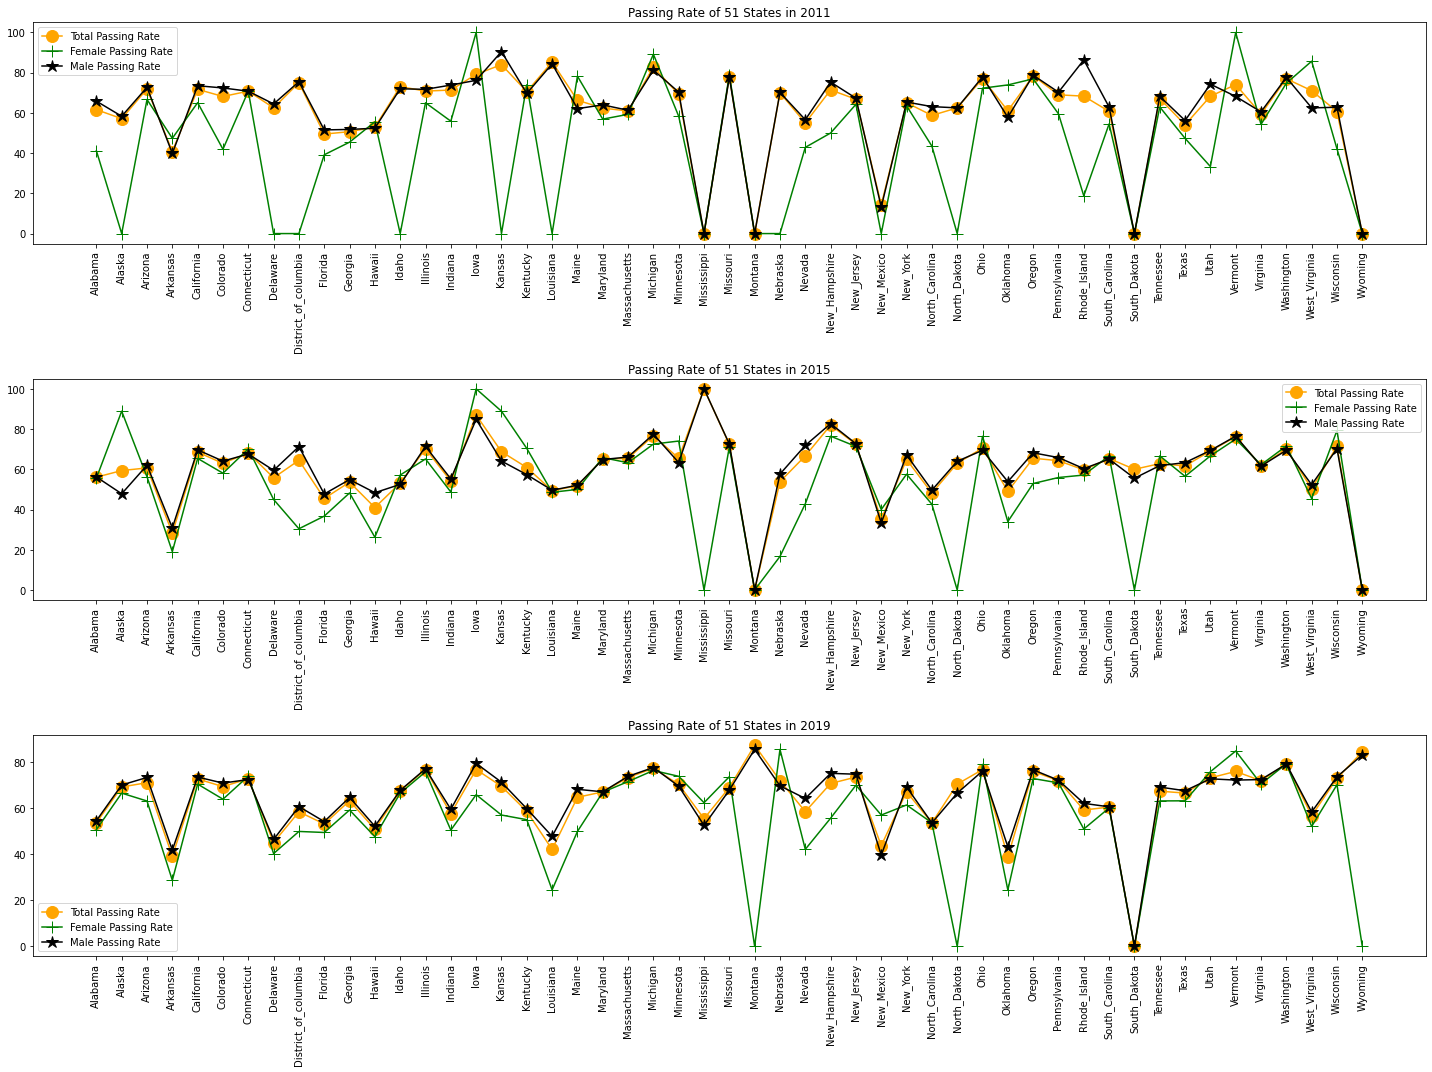

In [ ]:
fig, (ax1, ax5,ax9) = plt.subplots(3,1)
fig.set_figwidth(20)
fig.set_figheight(15)
ax1.plot(femalepr1119[femalepr1119['Year']==2011]['STATE'], femalepr1119[femalepr1119['Year']==2011][' % Passed'],color='orange',marker ='o', markersize = 12, label ='Total Passing Rate')
ax1.plot(femalepr1119[femalepr1119['Year']==2011]['STATE'],femalepr1119[femalepr1119['Year']==2011][' % Fem Passed'],color='green',marker ='+', markersize = 12, label ='Female Passing Rate')
ax1.plot(femalepr1119[femalepr1119['Year']==2011]['STATE'],femalepr1119[femalepr1119['Year']==2011][' % Male Passed'],color='black',marker ='*', markersize = 12, label ='Male Passing Rate')
ax1.legend()
ax1.title.set_text('Passing Rate of 51 States in 2011')

ax5.plot(femalepr1119[femalepr1119['Year']==2015]['STATE'], femalepr1119[femalepr1119['Year']==2015][' % Passed'],color='orange',marker ='o', markersize = 12,label ='Total Passing Rate')
ax5.plot(femalepr1119[femalepr1119['Year']==2015]['STATE'],femalepr1119[femalepr1119['Year']==2015][' % Fem Passed'],color='green',marker ='+', markersize = 12, label ='Female Passing Rate')
ax5.plot(femalepr1119[femalepr1119['Year']==2015]['STATE'],femalepr1119[femalepr1119['Year']==2015][' % Male Passed'],color='black',marker ='*', markersize = 12, label ='Male Passing Rate')
ax5.legend()
ax5.title.set_text('Passing Rate of 51 States in 2015')


ax9.plot(femalepr1119[femalepr1119['Year']==2019]['STATE'], femalepr1119[femalepr1119['Year']==2019][' % Passed'],color='orange',marker ='o', markersize = 12, label ='Total Passing Rate')
ax9.plot(femalepr1119[femalepr1119['Year']==2019]['STATE'],femalepr1119[femalepr1119['Year']==2019][' % Fem Passed'],color='green',marker ='+', markersize = 12, label ='Female Passing Rate')
ax9.plot(femalepr1119[femalepr1119['Year']==2019]['STATE'],femalepr1119[femalepr1119['Year']==2019][' % Male Passed'],color='black',marker ='*', markersize = 12, label ='Male Passing Rate')
ax9.legend()
ax9.title.set_text('Passing Rate of 51 States in 2019')
for ax in  fig.get_axes():
    ax.set_xticklabels(state,rotation=90)
fig.tight_layout()

### processing income data


In [ ]:
income={'Year':[],'Income':[],'STATE':[]}
for year in range(2010,2021):
    raw=pd.read_csv('/content/drive/Shareddrives/531project/income'+str(year)+'.csv')
    for i in range(51):
        income['Year'].append(year)
        if year<2017:
          avg_income=raw.iloc[1,3+4*i]
        else:
          avg_income=raw.iloc[1,5+6*i]
        avg_income= avg_income.replace(',','')
        avg_income=int(avg_income)
        income['Income'].append(avg_income)
        income['STATE'].append(state[i])
income=pd.DataFrame.from_dict(income)
income1119=income[(income['Year']!=2010 )& (income['Year']!=2020)].reset_index(drop=True)
income1119

,Year,Income,STATE
0,2011,57208,Alabama
1,2011,82665,Alaska
2,2011,62927,Arizona
3,2011,53204,Arkansas
4,2011,80848,California
...,...,...,...
454,2019,105091,Virginia
455,2019,105775,Washington
456,2019,65842,West_Virginia
457,2019,82899,Wisconsin


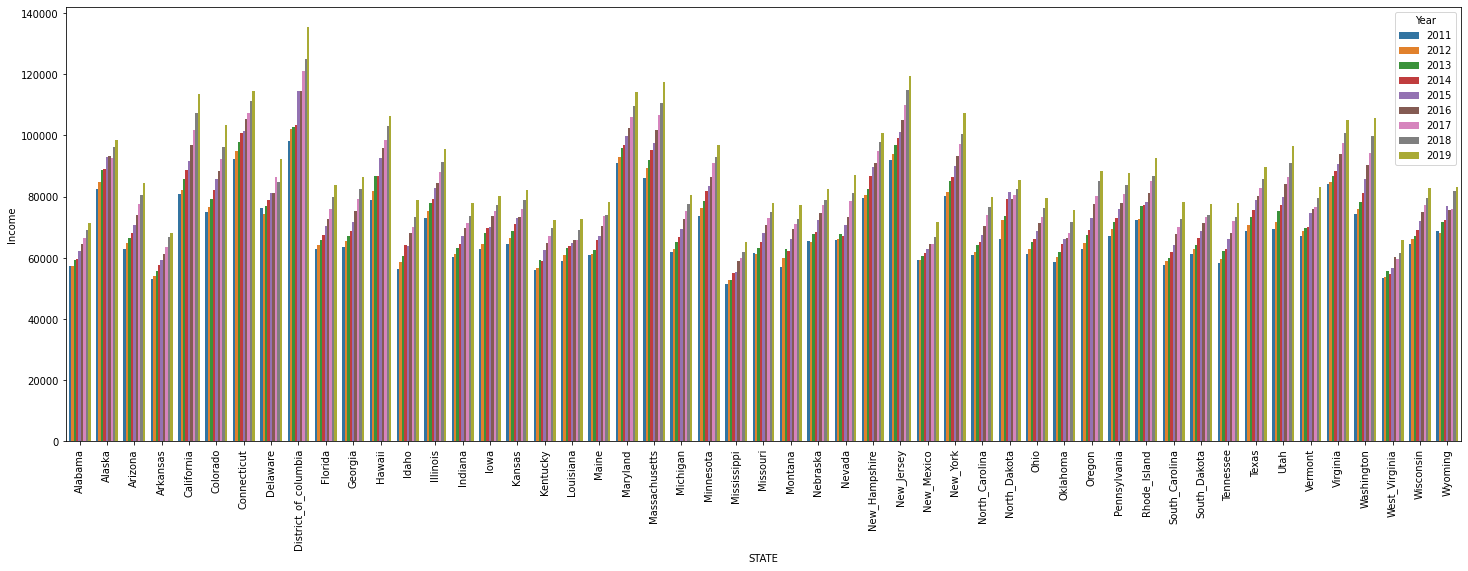

In [ ]:
plt.figure(figsize = (25,8))
ip=sns.barplot(x = income1119['STATE'],
            y = income1119['Income'],
            hue = income1119['Year'],
            ci = 0)
 
# Show the plot
for item in ip.get_xticklabels():
    item.set_rotation(90)
plt.show()

### processing race data

In [ ]:
race={'STATE':[],'Year':[],'whiter':[],'blackr':[]}
for year1 in range(2010,2021):
  raw=pd.read_csv('/content/drive/Shareddrives/531project/race_data/race'+str(year1)+'.csv')
  for i in range(51):
    race['STATE'].append(state[i])
    race['Year'].append(year1)
    if year1>=2017:
      wr=raw.iloc[38,3+4*i]
      wr=wr.replace('%','')
      wr=float(wr)
      br=raw.iloc[39,3+4*i]
      br=br.replace('%','')
      br=float(br)
    else:
      wr=raw.iloc[33,3+4*i]
      wr=wr.replace('%','')
      wr=float(wr)
      br=raw.iloc[34,3+4*i]
      br=br.replace('%','')
      br=float(br)
    race['whiter'].append(wr)
    race['blackr'].append(br)
race=pd.DataFrame.from_dict(race)
race1119=race[(race['Year']!=2010 )& (race['Year']!=2020)].reset_index(drop=True)
race1119

,STATE,Year,whiter,blackr
0,Alabama,2011,69.1,26.7
1,Alaska,2011,66.8,3.2
2,Arizona,2011,79.3,4.1
3,Arkansas,2011,78.2,15.8
4,California,2011,62.9,6.0
...,...,...,...,...
454,Virginia,2019,67.0,19.4
455,Washington,2019,74.2,4.0
456,West_Virginia,2019,93.1,3.7
457,Wisconsin,2019,85.2,6.4


In [ ]:
race_avg=race.groupby(['STATE']).mean()
race_avg.reset_index(inplace=True)
race_avg

,STATE,Year,whiter,blackr
0,Alabama,2015.0,68.436364,26.672727
1,Alaska,2015.0,65.318182,3.318182
2,Arizona,2015.0,77.790909,4.363636
3,Arkansas,2015.0,77.281818,15.581818
4,California,2015.0,60.445455,5.845455
5,Colorado,2015.0,83.836364,4.090909
6,Connecticut,2015.0,76.481818,10.490909
7,Delaware,2015.0,69.018182,21.818182
8,District_of_columbia,2015.0,40.754545,47.736364
9,Florida,2015.0,75.318182,16.063636


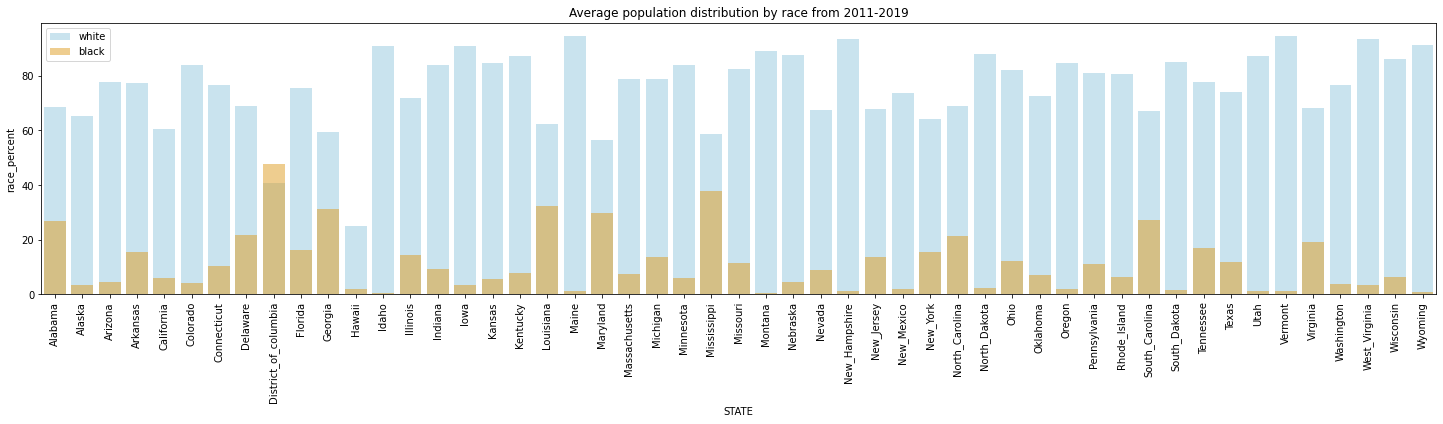

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
plt.xticks(rotation=90)
ax= sns.barplot(x='STATE',y='whiter', data=race_avg,color='skyblue',label="white",alpha=0.5)
ax1 = sns.barplot(x='STATE',y='blackr', data=race_avg,color = 'orange',label="black",alpha=0.5)
plt.ylabel("race_percent")
plt.title('Average population distribution by race from 2011-2019')
plt.legend()

### processing Federal obligations for science and engineering research and development to universities and colleges data

In [ ]:
RD_expend=pd.read_excel('/content/drive/Shareddrives/531project/engineer.xlsx')
RD_expend=RD_expend.iloc[1:52,1:]
RD_expend['STATE']=state
RD_expend

,2011,2012,2013,2014,2015,2016,2017,2018,2019,STATE
1,348384.9,347312.4,321500.6,342730.7,366299.6,354347.0,362466.2,442266.0,491035.2,Alabama
2,76613.2,54729.1,60997.7,66026.3,68093.2,70452.8,80760.8,78244.3,103531.5,Alaska
3,386576.3,441857.9,369922.5,338536.0,330838.6,341024.0,370208.5,395622.8,441188.2,Arizona
4,85157.3,67191.0,59098.8,55414.2,53583.4,105763.1,66975.3,80354.3,93614.8,Arkansas
5,3930189.1,3928742.2,3751424.7,3913638.7,3844293.7,3980511.2,4100916.6,4419363.8,4630852.1,California
6,591595.9,571955.3,577821.7,560697.6,602424.5,630337.7,648782.3,756505.2,748312.4,Colorado
7,538354.0,514764.4,484829.6,505356.6,480767.4,539370.4,546741.8,595892.7,661563.6,Connecticut
8,89496.1,76631.1,80240.5,91523.8,74640.6,101648.5,123060.9,112677.5,121590.0,Delaware
9,358976.8,455371.7,451730.9,445537.9,416509.9,466534.7,410861.6,518703.5,399414.7,District_of_columbia
10,662293.9,646622.2,596883.2,625298.1,714134.5,691837.9,780180.3,804749.9,934427.7,Florida


In [ ]:
RD_expend1=pd.DataFrame(RD_expend.set_index('STATE').stack())
RD_expend1.reset_index(inplace=True) 
RD_expend1.columns= ['STATE','Year','RD_expenditure']
RD_expend1

,STATE,Year,RD_expenditure
0,Alabama,2011,348384.9
1,Alabama,2012,347312.4
2,Alabama,2013,321500.6
3,Alabama,2014,342730.7
4,Alabama,2015,366299.6
...,...,...,...
454,Wyoming,2015,30815.7
455,Wyoming,2016,29398.1
456,Wyoming,2017,27494.6
457,Wyoming,2018,34185.5


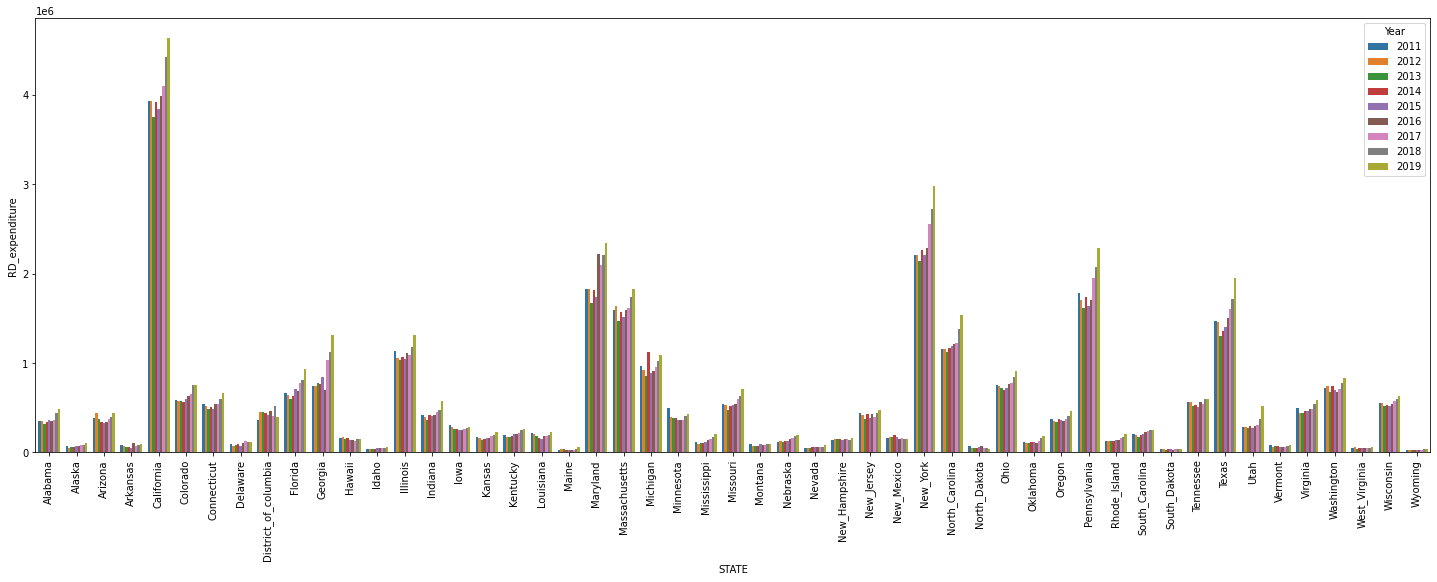

In [ ]:
plt.figure(figsize = (25,8))
ip=sns.barplot(x = RD_expend1['STATE'],
            y = RD_expend1['RD_expenditure'],
            hue = RD_expend1['Year'],
            ci = 0)
 
# Show the plot
for item in ip.get_xticklabels():
    item.set_rotation(90)
plt.show()

### processing Public high school 4-year adjusted cohort graduation rate (ACGR) data

NOTE: The adjusted cohort graduation rate (ACGR) is the percentage of public high school freshmen who graduate with a regular diploma within 4 years of starting 9th grade. Students who are entering 9th grade for the first time form a cohort for the graduating class. This cohort is "adjusted" by adding any students who subsequently transfer into the cohort and subtracting any students who subsequently transfer out, emigrate to another country, or die. Values preceded by the ">=" symbol have been "blurred" (rounded) to protect student privacy. Race categories exclude persons of Hispanic ethnicity. 

In [ ]:
acgr=pd.read_excel('/content/drive/Shareddrives/531project/acgr.xlsx')
acgr=acgr.iloc[:,1:]
acgr['STATE']=state

In [ ]:
acgr1=pd.DataFrame(acgr.set_index('STATE').stack())
acgr1.reset_index(inplace=True) 
acgr1.columns= ['STATE','Year','graduate_rate']
acgr1

,STATE,Year,graduate_rate
0,Alabama,2011,72.0
1,Alabama,2012,75.0
2,Alabama,2013,80.0
3,Alabama,2014,86.3
4,Alabama,2015,89.3
...,...,...,...
454,Wyoming,2015,79.0
455,Wyoming,2016,80.0
456,Wyoming,2017,86.0
457,Wyoming,2018,82.0


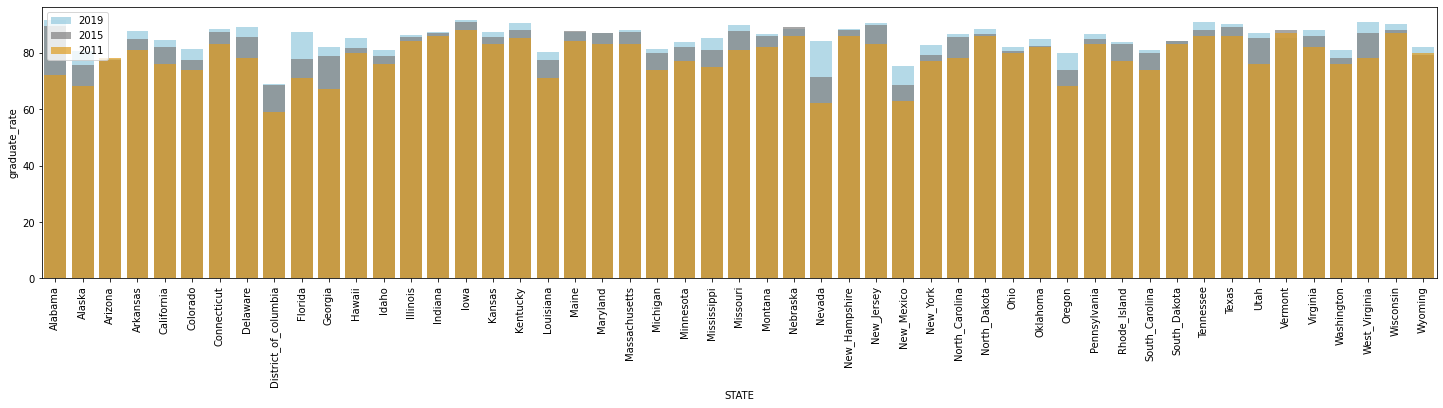

In [ ]:
acgr2019=acgr1[acgr1['Year']==2019]
acgr2015=acgr1[acgr1['Year']==2015]
acgr2011=acgr1[acgr1['Year']==2011]
fig, ax = plt.subplots(figsize=(25,5))
plt.xticks(rotation=90)
ax= sns.barplot(x = acgr2019['STATE'],y = acgr2019['graduate_rate'],color='skyblue',label="2019",alpha=0.7)
ax1 = sns.barplot(x = acgr2015['STATE'],y = acgr2015['graduate_rate'],color='grey',label="2015",alpha=0.7)
ax2 = sns.barplot(x = acgr2011['STATE'],y = acgr2011['graduate_rate'],color='orange',label="2011",alpha=0.7)
plt.legend()

### Merge all datasets

In [ ]:
df=income1119.merge(race, on=['STATE','Year']).merge(femalepr1119,on=['STATE','Year']).merge(acgr1,on=['STATE','Year']).merge(RD_expend1,on=['STATE','Year'])
df = df.rename(columns={' % Passed': 'PassRate', ' % Fem Passed': 'FemPassRate',' % Male Passed':'MalePassRate',' Total Passed': 'Total_passed'}) 

In [ ]:
df=df[['Year','Income','STATE','whiter','blackr','graduate_rate','RD_expenditure',' Total','Total_passed','Fem Total',' Fem Passed','Male Total',' Male Passed','PassRate','FemPassRate','MalePassRate']]
df

,Year,Income,STATE,whiter,blackr,graduate_rate,RD_expenditure,Total,Total_passed,Fem Total,Fem Passed,Male Total,Male Passed,PassRate,FemPassRate,MalePassRate
0,2011,57208,Alabama,69.1,26.7,72.0,348384.9,99,61,17,7,82,54,61.62,41.18,65.85
1,2011,82665,Alaska,66.8,3.2,68.0,76613.2,14,8,2,0,12,7,57.14,0.00,58.33
2,2011,62927,Arizona,79.3,4.1,78.0,386576.3,89,64,12,8,77,56,71.91,66.67,72.73
3,2011,53204,Arkansas,78.2,15.8,81.0,85157.3,152,62,19,9,133,53,40.79,47.37,39.85
4,2011,80848,California,62.9,6.0,76.0,3930189.1,3101,2224,659,429,2442,1795,71.72,65.10,73.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,2019,105091,Virginia,67.0,19.4,88.0,588940.2,3473,2502,968,684,2505,1818,72.04,70.66,72.57
455,2019,105775,Washington,74.2,4.0,81.0,827974.4,2113,1677,603,479,1510,1198,79.37,79.44,79.34
456,2019,65842,West_Virginia,93.1,3.7,91.0,60649.8,88,50,23,12,65,38,56.82,52.17,58.46
457,2019,82899,Wisconsin,85.2,6.4,90.0,631565.7,818,598,155,109,663,489,73.11,70.32,73.76


In [ ]:
# Mississippi, Montana, South Dakota and Wyoming 
df1 = df[(df['STATE']!='Mississippi')&(df['STATE']!='Montana')&(df['STATE']!='South_Dakota')&(df['STATE']!='North_Dakota')&(df['STATE']!='Wyoming')]
#df1['log_income']=np.log(df['Income'])

In [ ]:
df1

,Year,Income,STATE,whiter,blackr,graduate_rate,RD_expenditure,Total,Total_passed,Fem Total,Fem Passed,Male Total,Male Passed,PassRate,FemPassRate,MalePassRate
0,2011,57208,Alabama,69.1,26.7,72.0,348384.9,99,61,17,7,82,54,61.62,41.18,65.85
1,2011,82665,Alaska,66.8,3.2,68.0,76613.2,14,8,2,0,12,7,57.14,0.00,58.33
2,2011,62927,Arizona,79.3,4.1,78.0,386576.3,89,64,12,8,77,56,71.91,66.67,72.73
3,2011,53204,Arkansas,78.2,15.8,81.0,85157.3,152,62,19,9,133,53,40.79,47.37,39.85
4,2011,80848,California,62.9,6.0,76.0,3930189.1,3101,2224,659,429,2442,1795,71.72,65.10,73.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,2019,83015,Vermont,93.8,1.5,85.0,81051.0,67,51,20,17,47,34,76.12,85.00,72.34
454,2019,105091,Virginia,67.0,19.4,88.0,588940.2,3473,2502,968,684,2505,1818,72.04,70.66,72.57
455,2019,105775,Washington,74.2,4.0,81.0,827974.4,2113,1677,603,479,1510,1198,79.37,79.44,79.34
456,2019,65842,West_Virginia,93.1,3.7,91.0,60649.8,88,50,23,12,65,38,56.82,52.17,58.46


In [ ]:
black_median=df1['blackr'].median()
passrate_median=df1['PassRate'].median()

In [ ]:
black_median

8.25

In [ ]:
df_black1=df1[df1['blackr']>black_median]
df_black0=df1[df1['blackr']<black_median]
df_black1_passrate1=df_black1[df_black1['PassRate']>passrate_median]
df_black0_passrate1=df_black0[df_black0['PassRate']>passrate_median]
print(len(df_black1_passrate1)/len(df_black1))
print(len(df_black0_passrate1)/len(df_black0))

0.3961352657004831
0.6038647342995169


In [ ]:
stat_parity=len(df_black1_passrate1)/len(df_black1) - len(df_black0_passrate1)/len(df_black0)
stat_parity

-0.20772946859903385

In [ ]:
feature=['Income','whiter','blackr','graduate_rate','RD_expenditure','FemPassRate','MalePassRate']

## Method

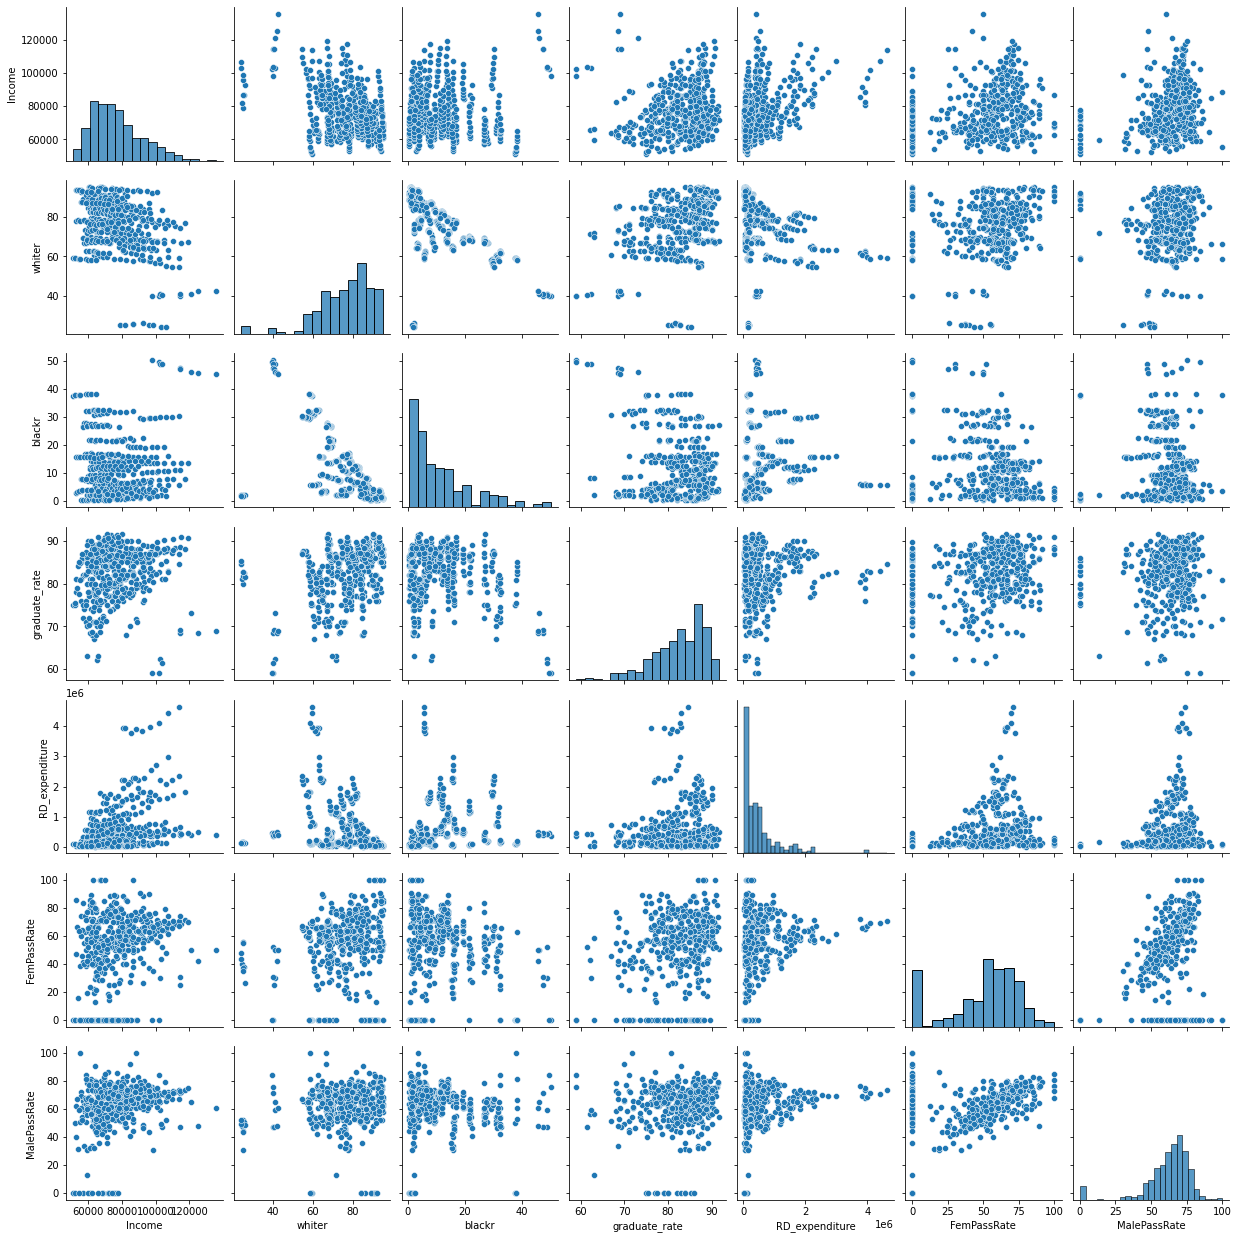

In [ ]:
sns.pairplot(df[feature])

In [ ]:
corr = df1[['Income','whiter','blackr','graduate_rate','RD_expenditure','PassRate','FemPassRate','MalePassRate']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Income,whiter,blackr,graduate_rate,RD_expenditure,PassRate,FemPassRate,MalePassRate
Income,1.000000,-0.428750,0.152657,0.081933,0.358425,0.203096,0.162977,0.213139
whiter,-0.428750,1.000000,-0.573191,0.344759,-0.258642,0.319923,0.223098,0.296799
blackr,0.152657,-0.573191,1.000000,-0.225774,0.148540,-0.247797,-0.194452,-0.221587
graduate_rate,0.081933,0.344759,-0.225774,1.000000,0.061969,0.123650,0.293228,0.106040
RD_expenditure,0.358425,-0.258642,0.148540,0.061969,1.000000,0.160761,0.210318,0.171999
PassRate,0.203096,0.319923,-0.247797,0.123650,0.160761,1.000000,0.455518,0.978858
FemPassRate,0.162977,0.223098,-0.194452,0.293228,0.210318,0.455518,1.000000,0.365046
MalePassRate,0.213139,0.296799,-0.221587,0.106040,0.171999,0.978858,0.365046,1.000000


In [ ]:
model1 = smf.ols(formula='MalePassRate~np.log(Income)+whiter+blackr+graduate_rate+RD_expenditure', data=df1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           MalePassRate   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     30.75
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           1.49e-26
Time:                        03:43:23   Log-Likelihood:                -1515.8
No. Observations:                 414   AIC:                             3044.
Df Residuals:                     408   BIC:                             3068.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -225.4649     34.991     -6.

In [ ]:
model1 = smf.ols(formula='PassRate~ FemPassRate', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               PassRate   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     161.7
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           6.26e-32
Time:                        03:43:23   Log-Likelihood:                -1855.1
No. Observations:                 459   AIC:                             3714.
Df Residuals:                     457   BIC:                             3722.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      45.1369      1.433     31.497      

In [ ]:
train=df1[df1['Year']!=2019]
test=df1[df1['Year']==2019]
X_train = train[['Income','whiter','blackr','graduate_rate','RD_expenditure']]
X_test = test[['Income','whiter','blackr','graduate_rate','RD_expenditure']]
y_train_male = train['MalePassRate']
y_test_male = test['MalePassRate']
y_train_female = train['FemPassRate']
y_test_female = test['FemPassRate']
y_train_total = train['PassRate']
y_test_total = test['PassRate']

In [ ]:
#model = RandomForestRegressor()
#model = GradientBoostingRegressor()
#model = DecisionTreeRegressor()
model = LinearRegression()
model.fit(X_train, y_train_male)
pred_y=model.predict(X_test)
test_error=mean_squared_error(y_test_male,pred_y)
print('test error for male passing rate is',test_error)

test error for male passing rate is 58.83008155269446


In [ ]:
model.fit(X_train, y_train_female)
pred_y=model.predict(X_test)
test_error=mean_squared_error(y_test_female,pred_y)
print('test error for female passing rate is',test_error)

test error for female passing rate is 146.47605735285623


In [ ]:
model.fit(X_train, y_train_total)
pred_y=model.predict(X_test)
test_error=mean_squared_error(y_test_total,pred_y)
print('test error for total passing rate is',test_error)

test error for total passing rate is 63.89704075663718


In [ ]:
df

,Year,Income,STATE,whiter,blackr,graduate_rate,RD_expenditure,Total,Total_passed,Fem Total,Fem Passed,Male Total,Male Passed,PassRate,FemPassRate,MalePassRate
0,2011,57208,Alabama,69.1,26.7,72.0,348384.9,99,61,17,7,82,54,61.62,41.18,65.85
1,2011,82665,Alaska,66.8,3.2,68.0,76613.2,14,8,2,0,12,7,57.14,0.00,58.33
2,2011,62927,Arizona,79.3,4.1,78.0,386576.3,89,64,12,8,77,56,71.91,66.67,72.73
3,2011,53204,Arkansas,78.2,15.8,81.0,85157.3,152,62,19,9,133,53,40.79,47.37,39.85
4,2011,80848,California,62.9,6.0,76.0,3930189.1,3101,2224,659,429,2442,1795,71.72,65.10,73.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,2019,105091,Virginia,67.0,19.4,88.0,588940.2,3473,2502,968,684,2505,1818,72.04,70.66,72.57
455,2019,105775,Washington,74.2,4.0,81.0,827974.4,2113,1677,603,479,1510,1198,79.37,79.44,79.34
456,2019,65842,West_Virginia,93.1,3.7,91.0,60649.8,88,50,23,12,65,38,56.82,52.17,58.46
457,2019,82899,Wisconsin,85.2,6.4,90.0,631565.7,818,598,155,109,663,489,73.11,70.32,73.76


In [ ]:
df1['FPR']=df1['Male Total']/df1[' Total']
df1['FPR'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    414.000000
mean       0.811527
std        0.060060
min        0.629630
25%        0.767274
50%        0.807682
75%        0.849928
max        1.000000
Name: FPR, dtype: float64

## Prediction


In [ ]:
log_df=df1[['Year','Income','whiter','graduate_rate','RD_expenditure','FPR','PassRate']]
pr_mean=log_df['PassRate'].mean()
log_df['PassRate'].loc[log_df["PassRate"] <=pr_mean] = 0
log_df['PassRate'].loc[log_df["PassRate"] >pr_mean] = 1
wr_mean=log_df['whiter'].mean()
log_df['whiter'].loc[log_df["whiter"] <=wr_mean] = 0
log_df['whiter'].loc[log_df["whiter"] >wr_mean] = 1
wr_mean=log_df['FPR'].mean()
log_df['FPR'].loc[log_df["FPR"] <=wr_mean] = 0
log_df['FPR'].loc[log_df["FPR"] >wr_mean] = 1
log_df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Year,Income,whiter,graduate_rate,RD_expenditure,FPR,PassRate
0,2011,57208,0.0,72.0,348384.9,1.0,0.0
1,2011,82665,0.0,68.0,76613.2,1.0,0.0
2,2011,62927,1.0,78.0,386576.3,1.0,1.0
3,2011,53204,1.0,81.0,85157.3,1.0,0.0
4,2011,80848,0.0,76.0,3930189.1,0.0,1.0
...,...,...,...,...,...,...,...
453,2019,83015,1.0,85.0,81051.0,0.0,1.0
454,2019,105091,0.0,88.0,588940.2,0.0,1.0
455,2019,105775,0.0,81.0,827974.4,0.0,1.0
456,2019,65842,1.0,91.0,60649.8,0.0,0.0


In [ ]:
test=log_df[(log_df["Year"]==2019)]
train=log_df[(log_df["Year"]!=2019)]
train_x=train.iloc[:, :-1]
test_x=test.iloc[:, :-1]
train_y=train.iloc[:,-1].values
test_y=test.iloc[:,-1].values
test_ses=test_x['FPR'].values

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
m1=model.fit(train_x,train_y)
pred1=m1.predict(test_x)
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_y, pred1)
stat_p = stat_parity(pred1, test_ses)
eq_op = eq_oppo(pred1, test_ses, test_y)
print(acc, stat_p, eq_op)

0.717391304347826 0.19512195121951215 0.08333333333333337


In [ ]:
test_ses=test_x['whiter'].values
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
m1=model.fit(train_x,train_y)
pred1=m1.predict(test_x)
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_y, pred1)
stat_p = stat_parity(pred1, test_ses)
eq_op = eq_oppo(pred1, test_ses, test_y)
print(acc, stat_p, eq_op)

0.717391304347826 -0.07196969696969702 -0.10526315789473684


In [ ]:
test_x=test_x.drop(columns='FPR')
train_x=train_x.drop(columns='FPR')
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
m1=model.fit(train_x,train_y)
pred1=m1.predict(test_x)
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_y, pred1)
stat_p = stat_parity(pred1, test_ses)
eq_op = eq_oppo(pred1, test_ses, test_y)
print(acc, stat_p, eq_op)


0.75 0.03549783549783547 0.0


In [ ]:
def stat_parity(preds, sens):
    '''
    :preds: numpy array of the model predictions. Consisting of 0s and 1s
    :sens: numpy array of the sensitive features. Consisting of 0s and 1s
    :return: the statistical parity. no need to take the absolute value
    '''
    
    # TODO. 10pts
    s0_p1=0
    s_1_p1=0
    s1=sens.sum()
    s0=len(sens)-s1
    #find which is sensitive group
    for i in range(len(sens)):
        #find ypred=1
        if sens[i]==0:
            if preds[i]==1:
                s0_p1=s0_p1+1 
        else:
            if preds[i]==1:
                s_1_p1=s_1_p1+1
    sp=(s_1_p1/s1)-(s0_p1/s0)
    return sp

def eq_oppo(preds, sens, labels):
    '''
    :preds: numpy array of the model predictions. Consisting of 0s and 1s
    :sens: numpy array of the sensitive features. Consisting of 0s and 1s
    :labels: numpy array of the ground truth labels of the outcome. Consisting of 0s and 1s
    :return: the statistical parity. no need to take the absolute value
    '''
    
    # TODO. 10pts
    s0_l1_p1=0
    s1_l1_p1=0
    s1_l1=0
    s0_l1=0
    #split the protected group
    for i in range(len(sens)):
        if sens[i]==0:
            #find its actual label=1
            if labels[i]==1:
                s0_l1= s0_l1+1
                #find y pred=1
                if preds[i]==1:
                    s0_l1_p1=s0_l1_p1+1 
        else:
            if labels[i]==1:
                s1_l1= s1_l1+1
                if preds[i]==1:
                    s1_l1_p1=s1_l1_p1+1 
    if s1_l1==0:
        p1=0
    else:
        p1=(s1_l1_p1/s1_l1)
    if s0_l1==0:
        p2=0
    else:
        p2=s0_l1_p1/s0_l1
    eqop=p1-p2
   
    return eqop